In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore')

There are 14 attributes in each case of the dataset. They are:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [2]:
# load the dataset
dataset = pd.read_csv('..\datasets\HousingData.csv')
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
# information of dataset
df = dataset.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
# checking null values
null = df.isnull().sum()
null

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [6]:
null_value_columns = [column for column in df.columns if df[column].isnull().sum() > 0]
null_value_columns

['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']

In [7]:
for column in null_value_columns:
    print("*****************", column, "*****************")
    print(df[df[column].isnull()])
    print("*"*50)

***************** CRIM *****************
     CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  PTRATIO  \
53    NaN  21.0   5.64   0.0  0.439  5.998   21.4  6.8147    4  243     16.8   
115   NaN   0.0  10.01   0.0  0.547  5.928   88.2  2.4631    6  432     17.8   
183   NaN   0.0   2.46   0.0  0.488  6.563   95.6  2.8470    3  193     17.8   
191   NaN  45.0   3.44   0.0  0.437  6.739   30.8  6.4798    5  398     15.2   
192   NaN  45.0   3.44   0.0  0.437  7.178   26.3  6.4798    5  398     15.2   
196   NaN  80.0   1.52   0.0  0.404  7.287   34.1  7.3090    2  329     12.6   
229   NaN   0.0   6.20   0.0  0.504  6.552   21.4  3.3751    8  307     17.4   
236   NaN   0.0   6.20   1.0  0.507  6.631   76.5  4.1480    8  307     17.4   
241   NaN  30.0   4.93   0.0  0.428  6.095   65.1  6.3361    6  300     16.6   
262   NaN  20.0   3.97   0.0  0.647  8.398   91.5  2.2885    5  264     13.0   
288   NaN  52.5   5.32   0.0  0.405  6.315   45.6  7.3172    6  293     16.6   

In [8]:
null_value_columns

['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']

In [9]:
df['CRIM'].fillna(df['CRIM'].mean(), inplace=True)
df['ZN'].fillna(df['ZN'].mean(), inplace=True)
df['INDUS'].fillna(df['INDUS'].mean(), inplace=True)
df['CHAS'].fillna(df['CHAS'].mode()[0], inplace=True )
df['AGE'].fillna(df['AGE'].mean(), inplace=True)
df['LSTAT'].fillna(df['LSTAT'].mean(), inplace=True)

In [10]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [11]:
print("the duplicate values are :",len(df[df.duplicated()]))

the duplicate values are : 0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.611874,8.545770,0.00632,0.083235,0.29025,3.611874,88.9762
ZN,506.0,11.211934,22.921051,0.00000,0.000000,0.00000,11.211934,100.0000
INDUS,506.0,11.083992,6.699165,0.46000,5.190000,9.90000,18.100000,27.7400
CHAS,506.0,0.067194,0.250605,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.518519,27.439466,2.90000,45.925000,74.45000,93.575000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


<Axes: >

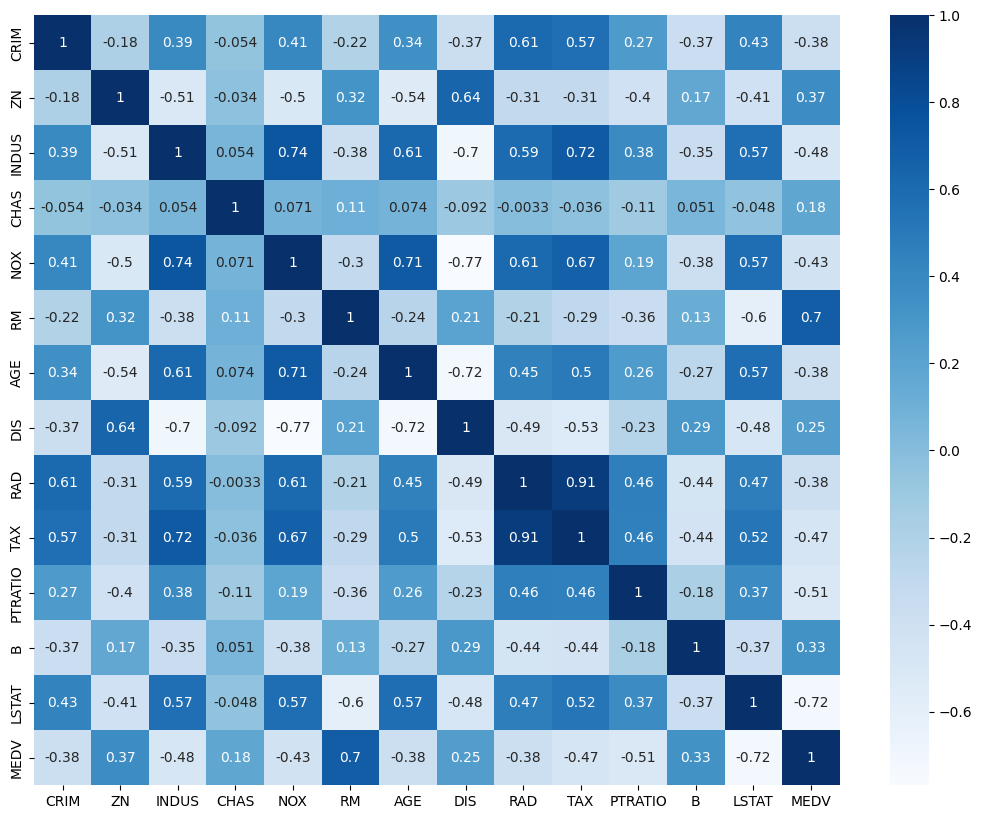

In [13]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), cmap="Blues", annot=True, )

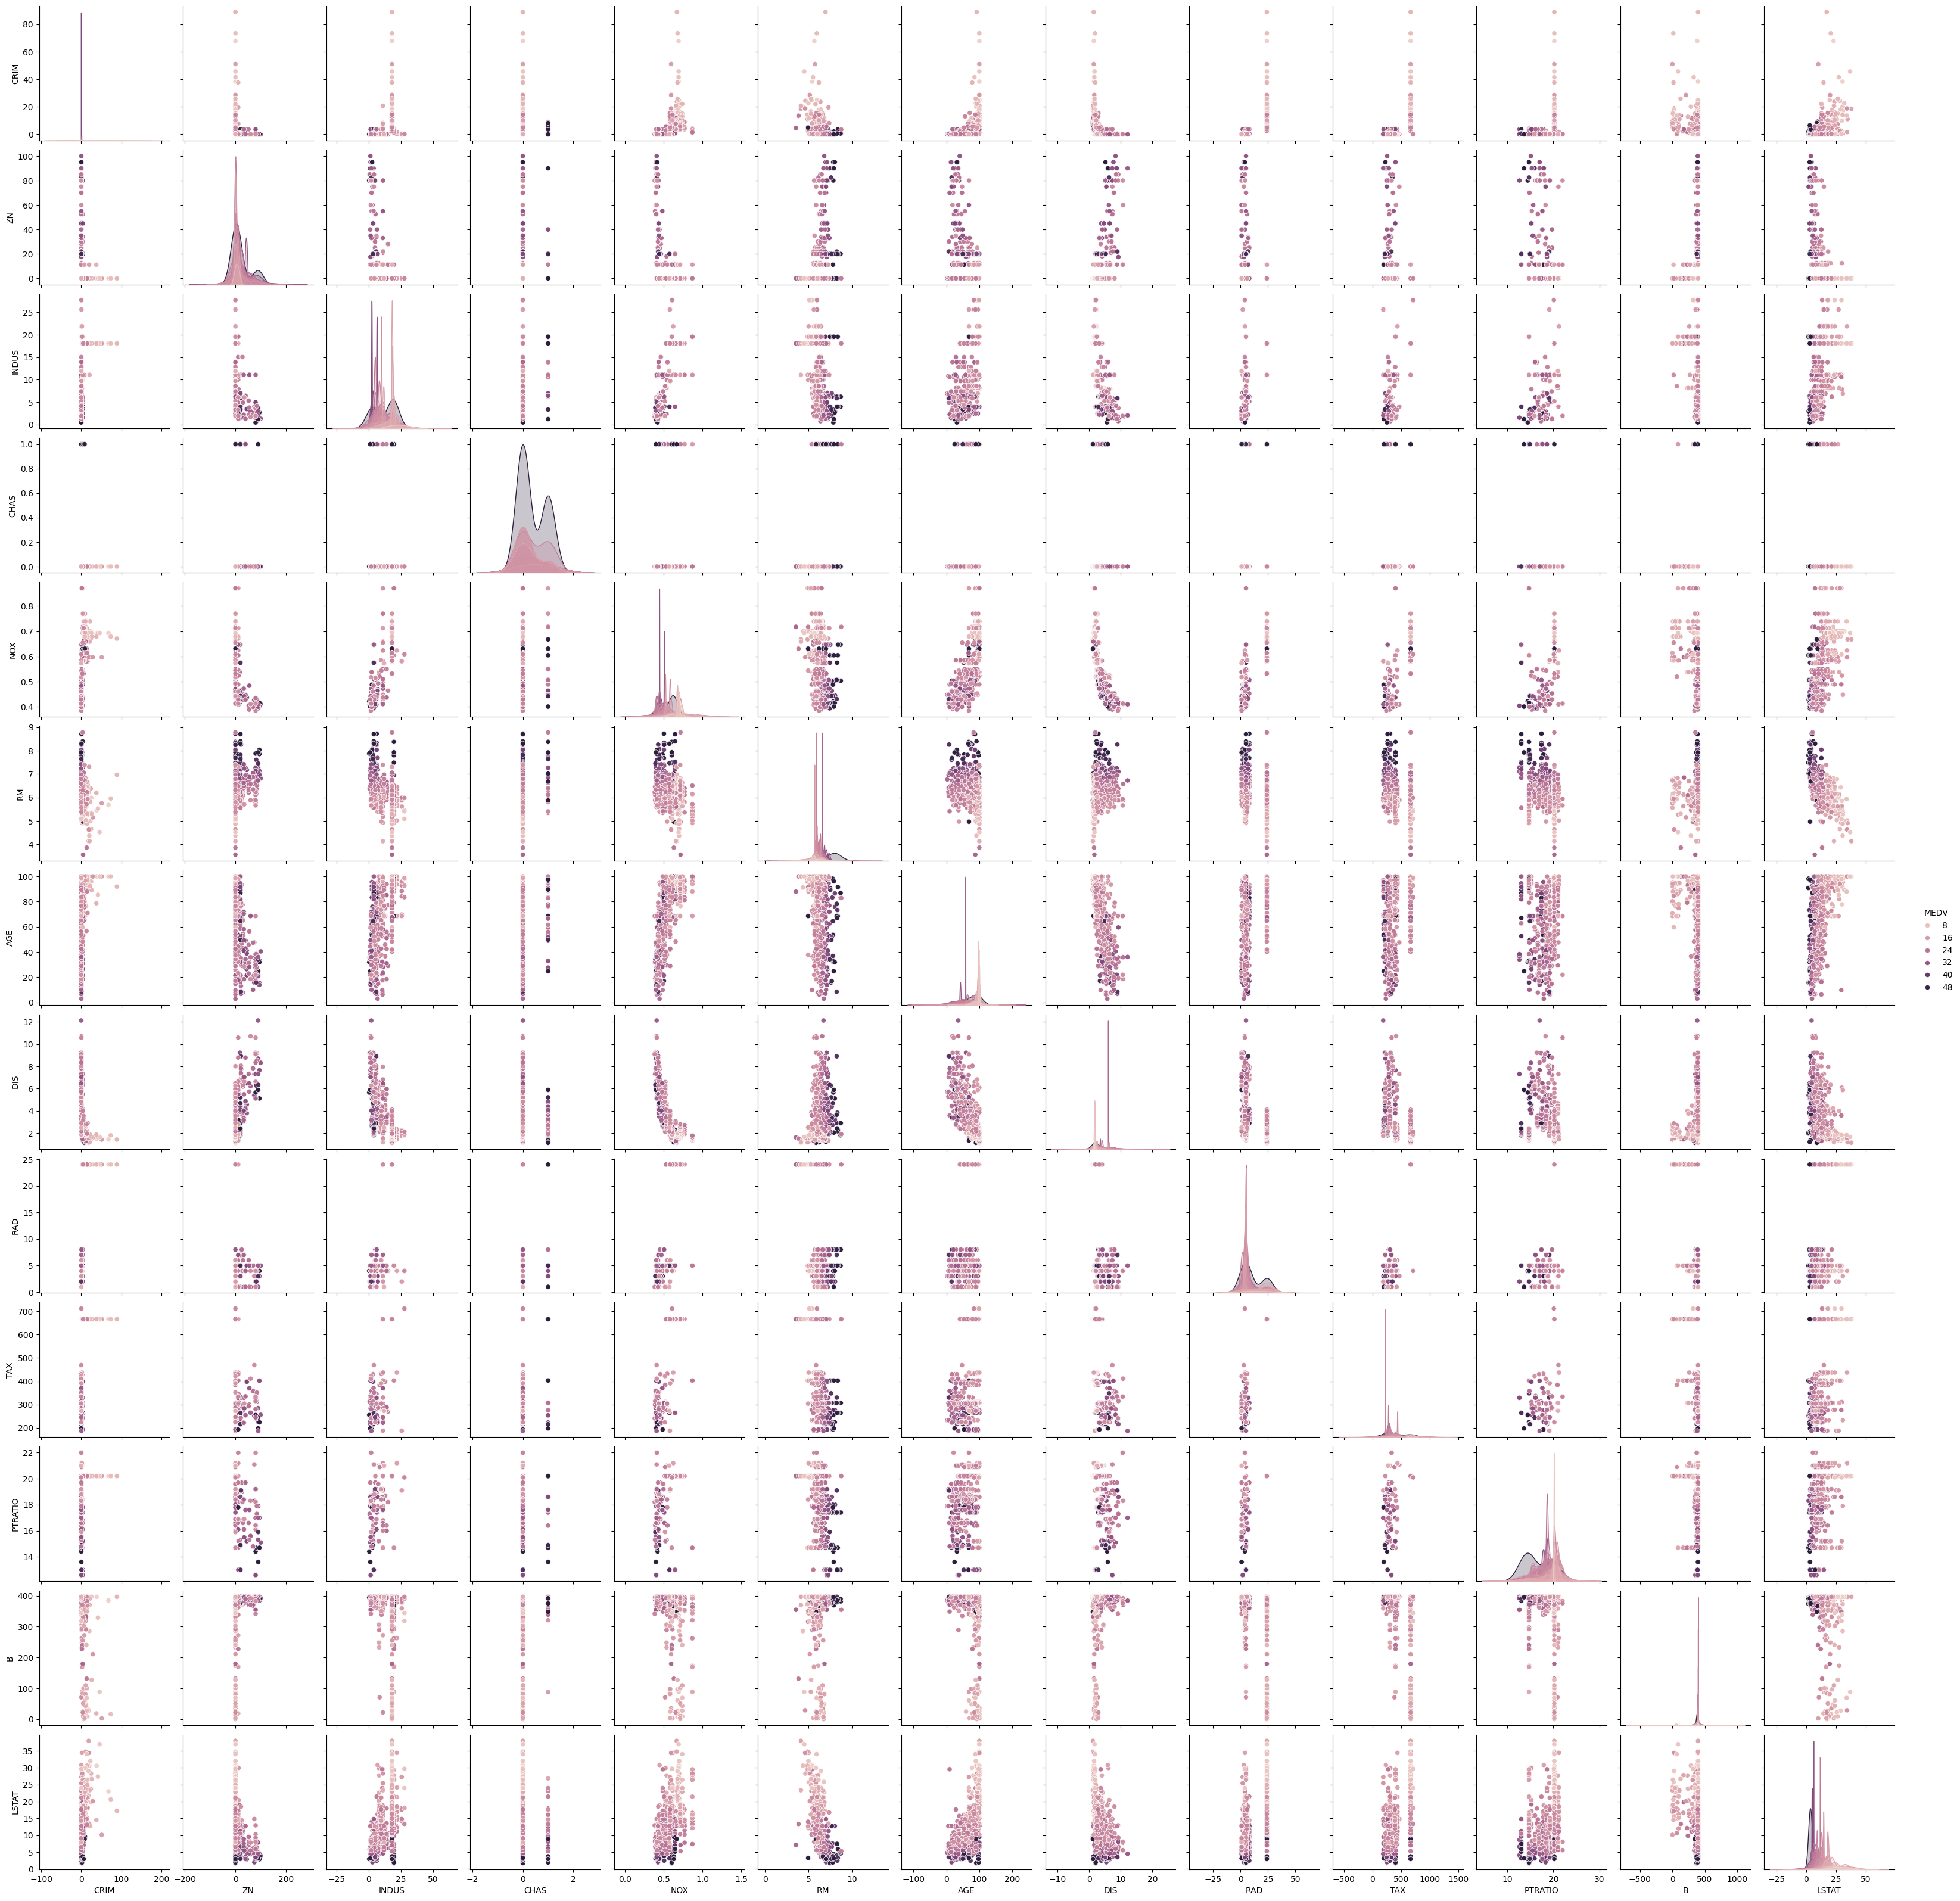

In [14]:
sns.pairplot(df, hue='MEDV')

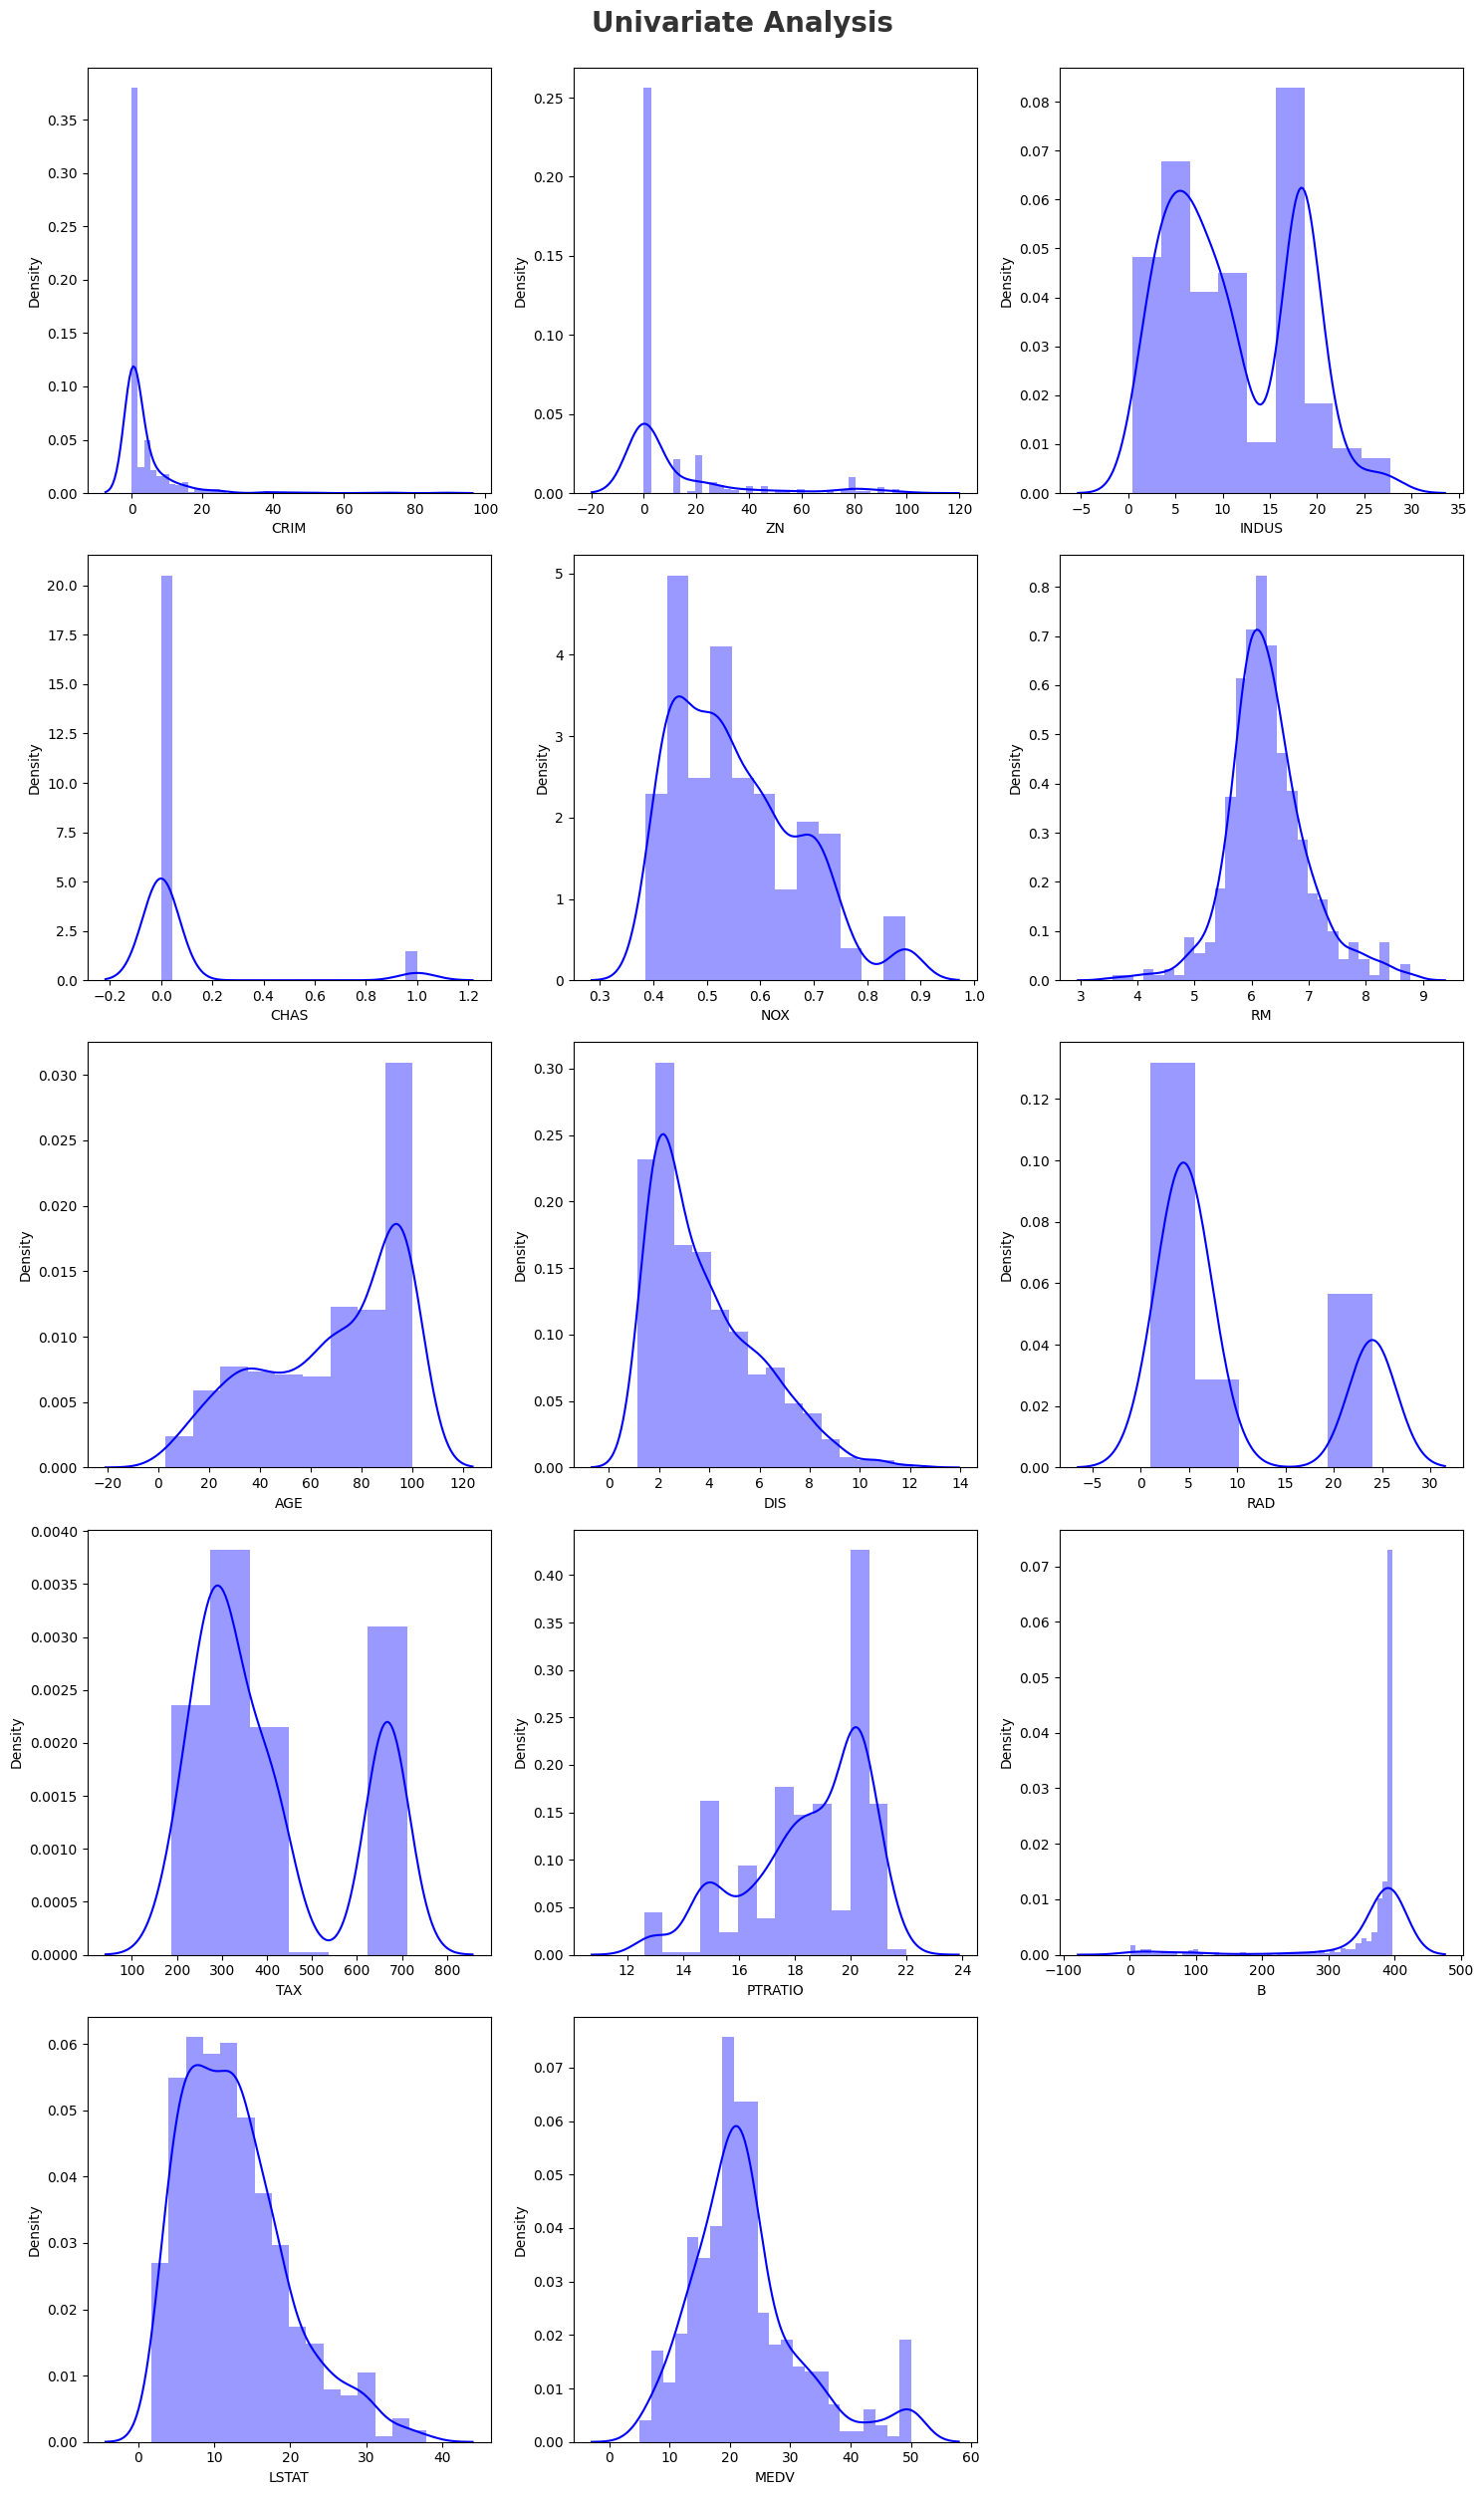

In [15]:
plt.figure(figsize=(15,25))
plt.suptitle("Univariate Analysis", fontsize=20, fontweight='bold',alpha=0.8, y=1.)

for i, column in enumerate(df.columns):

    ax = plt.subplot(5, 3, i+1)
    sns.distplot(df[column], ax=ax, color="blue")
    plt.xlabel(column)
    plt.tight_layout()
plt.savefig('./images/univariate analysis.png')
plt.show()


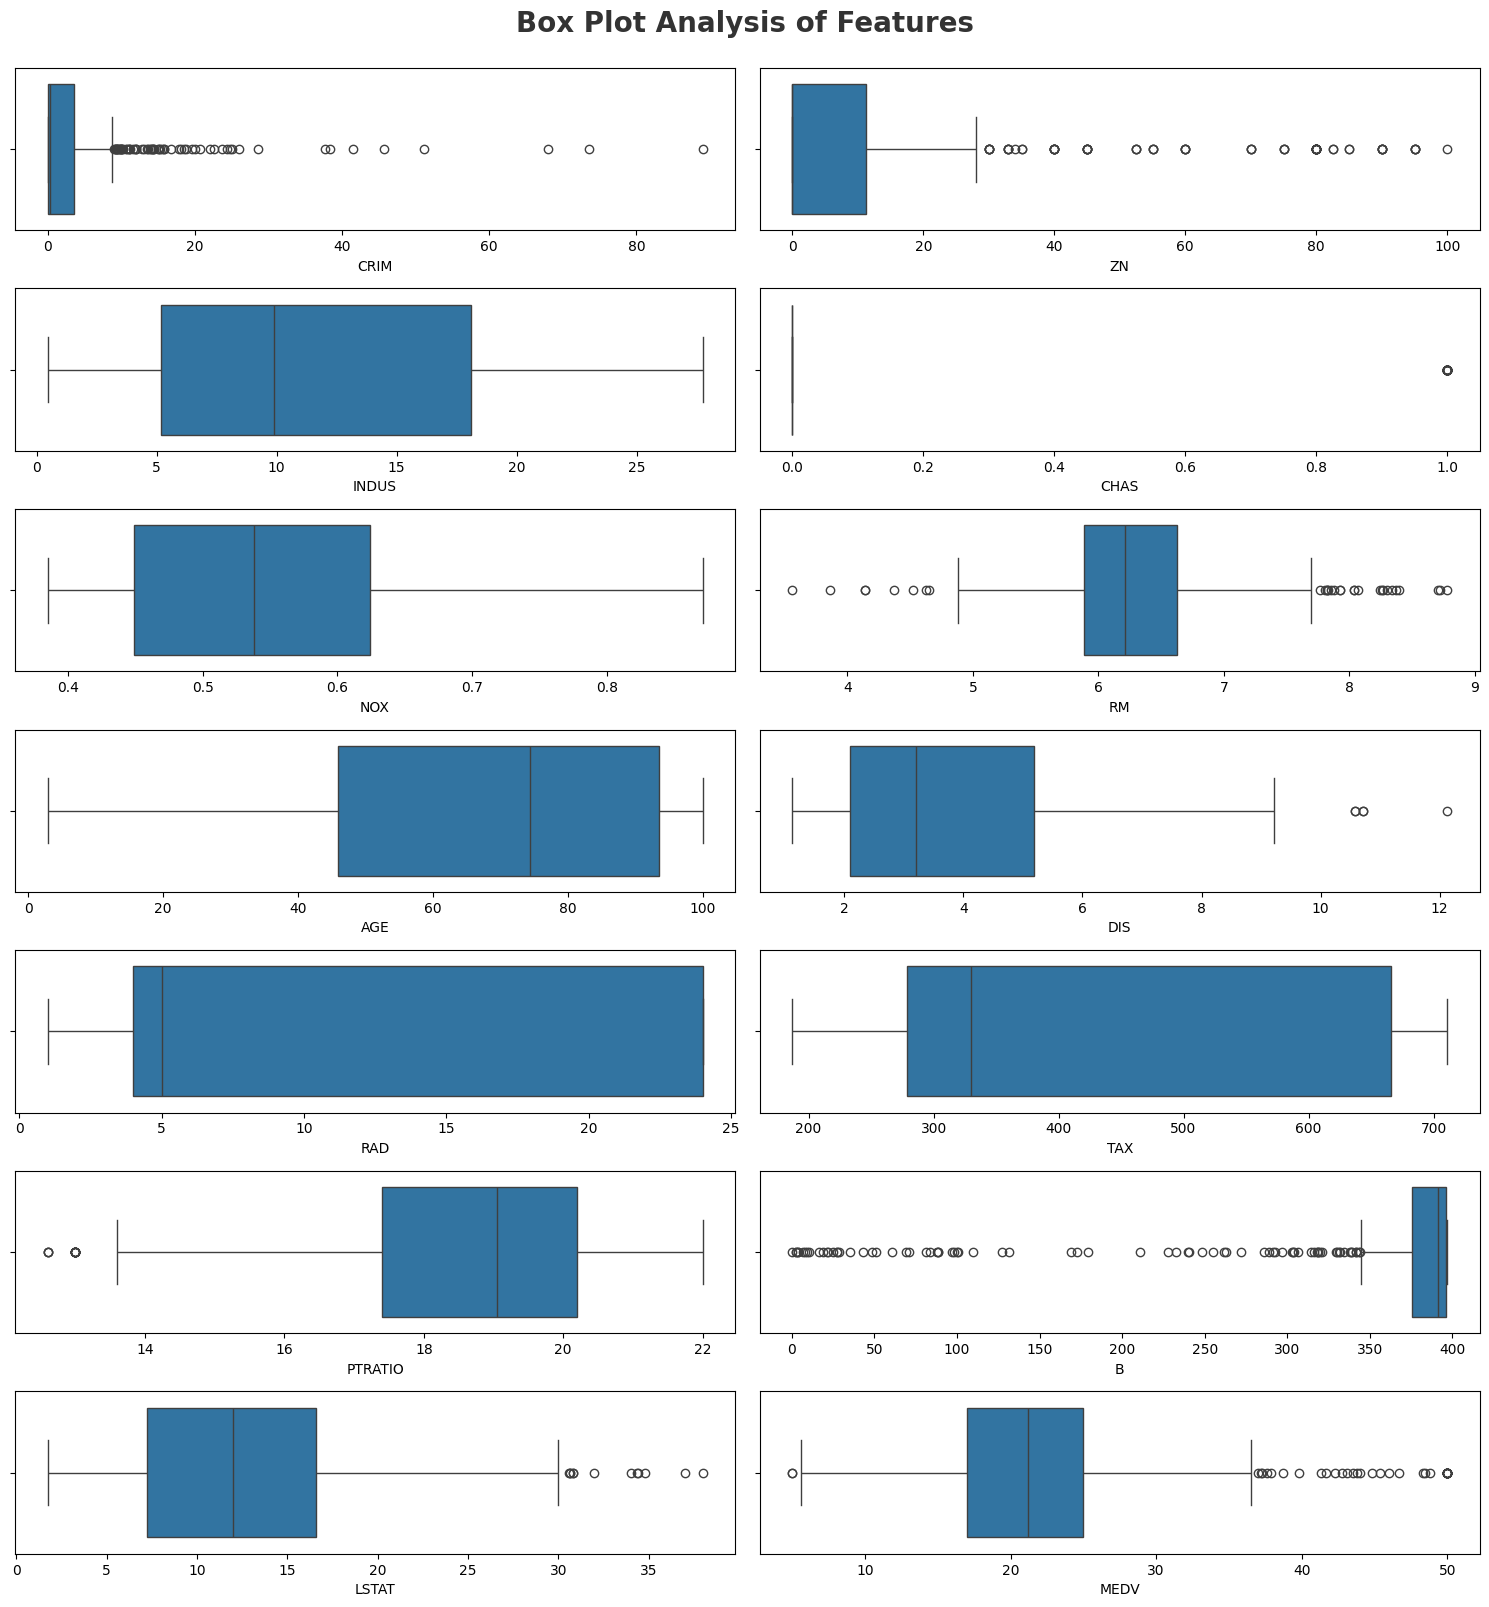

In [16]:
plt.figure(figsize=(15,20))
plt.suptitle('Box Plot Analysis of Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i, feature in enumerate(df.columns):

    ax = plt.subplot(9, 2, i+1)
    sns.boxplot(x=df[feature], ax=ax)
    plt.xlabel(feature)
    plt.tight_layout()

plt.savefig("./images/boxplot.jpg")

In [17]:
columns_have_outliers = []
def clip_column(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    LC = Q1 - 1.5*IQR
    UC = Q3 + 1.5*IQR

    if df[column].lt(LC).any() or df[column].gt(UC).any():
        print(column)
        columns_have_outliers.append(column)
        df[column] = df[column].clip(lower=LC, upper=UC)

In [18]:
# outliers
for column in [c for c in df.columns if c != 'MEDV']:
    clip_column(column)

CRIM
ZN
CHAS
RM
DIS
PTRATIO
B
LSTAT


In [19]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2


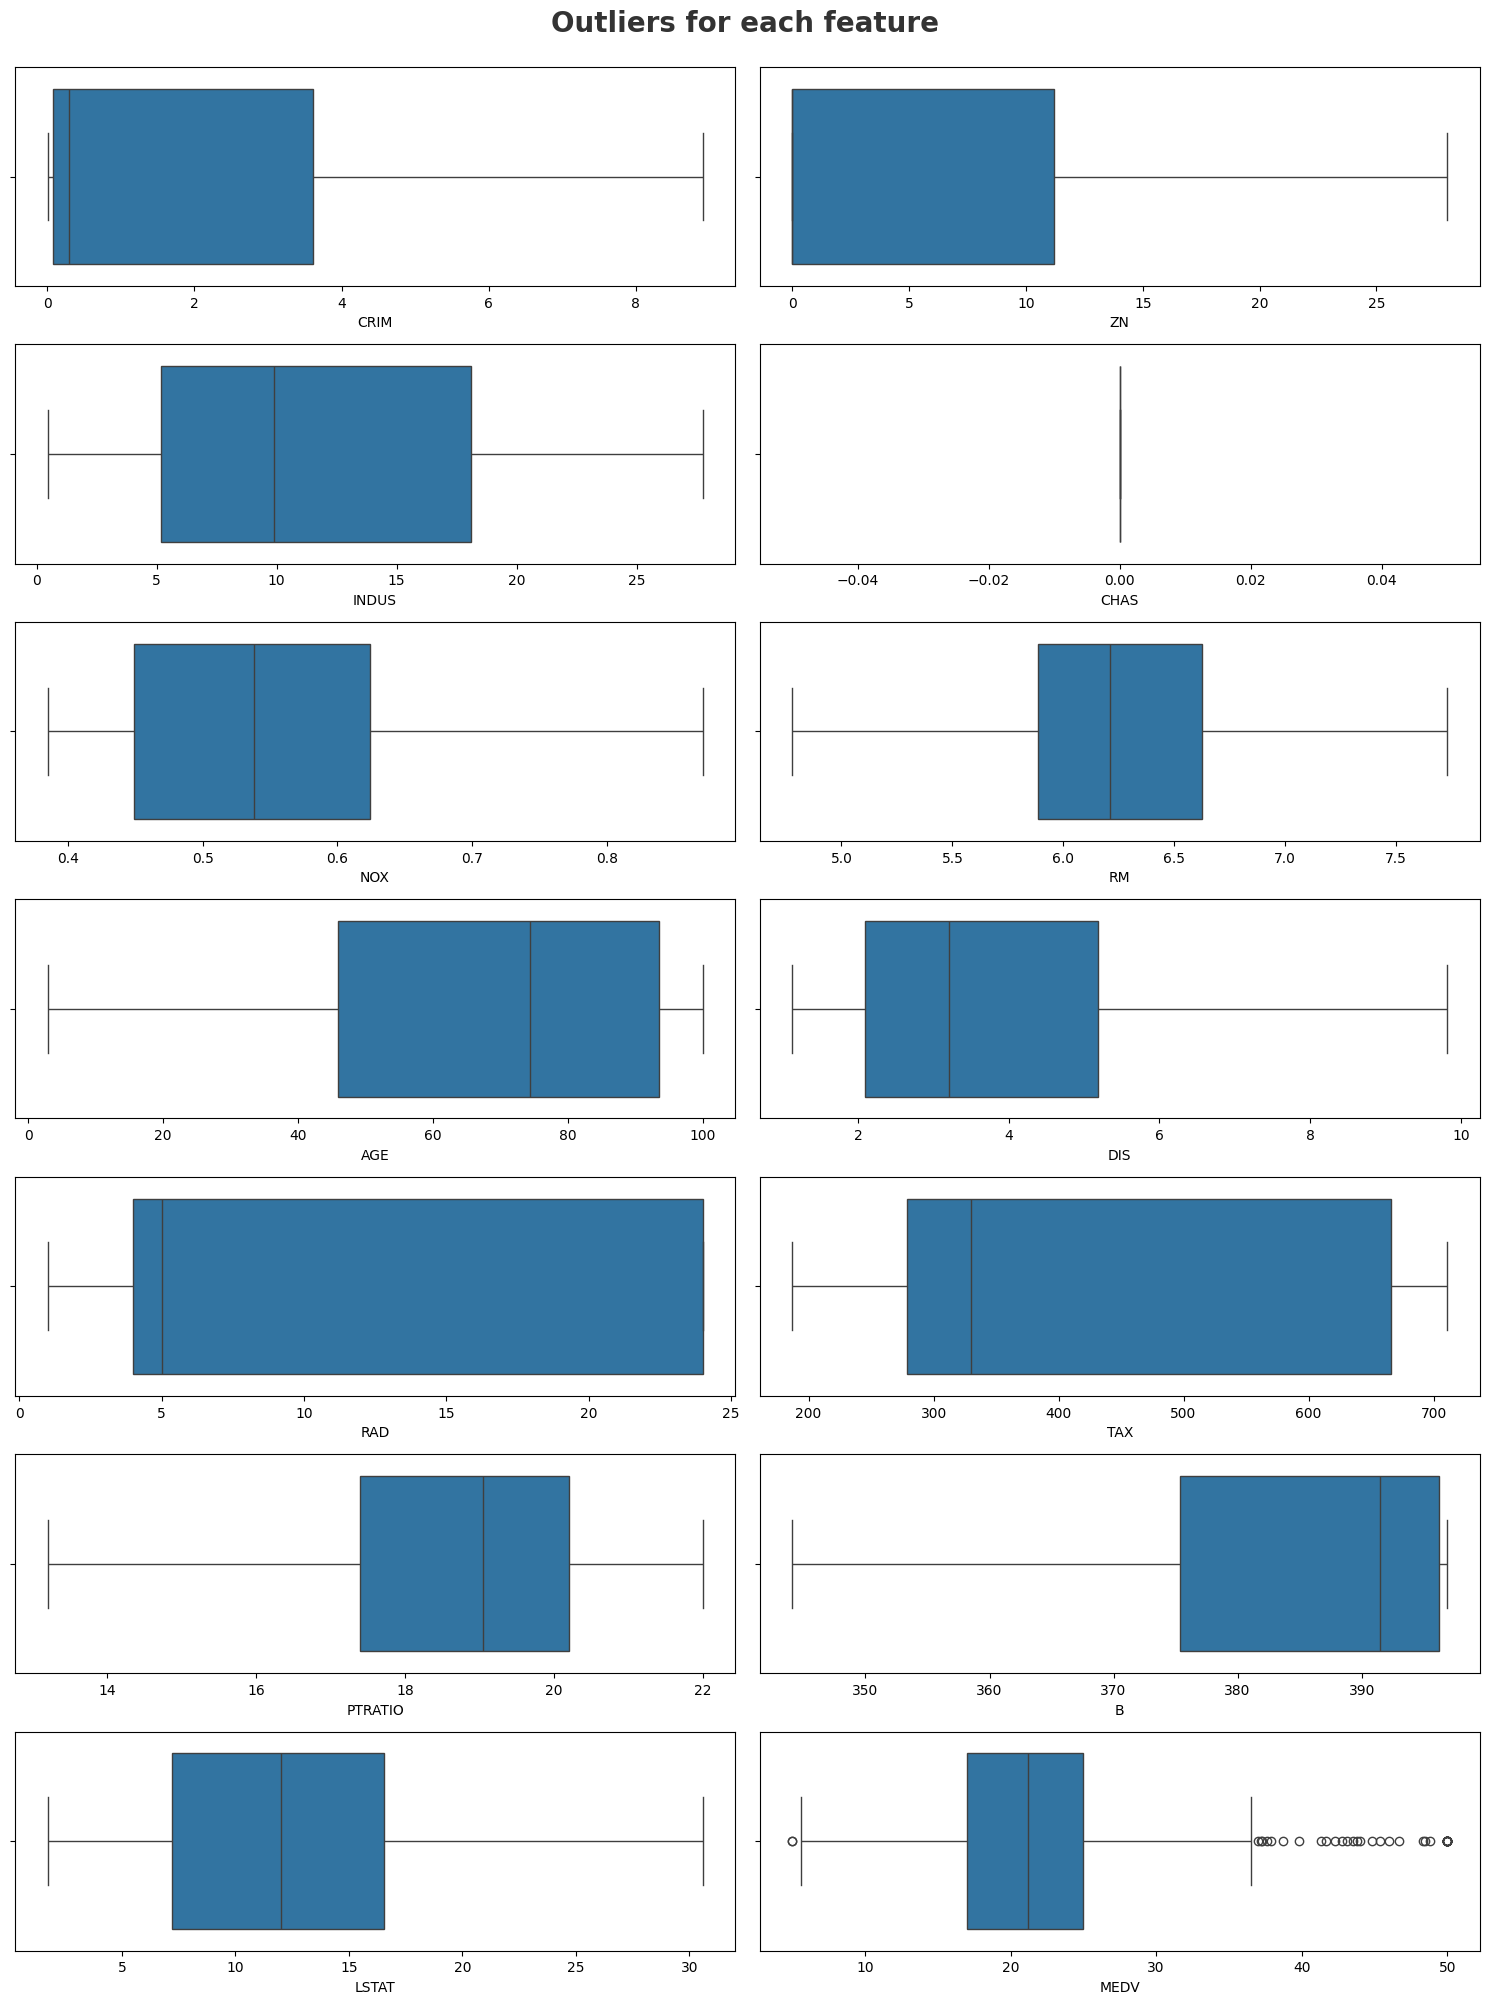

In [20]:
plt.figure(figsize=(15,20))
plt.suptitle("Outliers for each feature", fontsize=20, fontweight="bold", alpha=0.8, y=1)

for i, column in enumerate(df.columns):

    ax = plt.subplot(7, 2, i+1)
    sns.boxplot(x=df[column], ax=ax)
    plt.xlabel(column)
    plt.tight_layout()
plt.savefig("./images/boxplot_without_outliers.jpg")

In [21]:
def highly_correlated_features(df, threshold):
    """
    Identify pairs of highly correlated features in a DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame with numerical columns.
    threshold (float): The correlation threshold above which features are considered highly correlated.

    Returns:
    set: A set of tuples, where each tuple contains the names of two highly correlated columns.
    """
    columns_highly_correlated = set()
    corr_matrix = df.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                columns_highly_correlated.add(corr_matrix.columns[j])

    return columns_highly_correlated


In [22]:
highly_correlated_features(df, threshold=0.9)

{'RAD', 'TAX'}

In [23]:
# dropping the column RAD
df.drop(columns=['RAD'], axis=1, inplace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222,18.7,396.90,12.715432,36.2


In [24]:
df.to_csv('../datasets/BostonHousingCleaned.csv', index=False)

In [28]:
num_columns = [column for column in df.columns if df[column].nunique() > 25]
num_columns

['CRIM',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

In [29]:
cat_columns = [column for column in df.columns if column not in num_columns]
cat_columns

['ZN', 'CHAS']

In [30]:
df['ZN'].unique()

array([18.        ,  0.        , 12.5       , 28.02983539, 21.        ,
       25.        , 17.5       , 11.21193416, 28.        , 22.        ,
       20.        ])

In [1]:
from sklearn.linear_model import LinearRegression

In [2]:
print(LinearRegression())

LinearRegression()


In [3]:
LinearRegression()

LinearRegression()